In [1]:
from pylab import *

In [144]:
def malla_cuad_circ(x,y,r=0.5,V0=1):
    Nx , Ny = len(x) , len(y) # i,j
    malla = zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( x[i]**2 + y[j]**2) < r:
                malla[i,j] = 1
            else:
                malla[i,j] = V0*rand()
    return malla

def Relajar(V,V0=1):
    Nx , Ny = V.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if V[i,j] != 1:
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V    

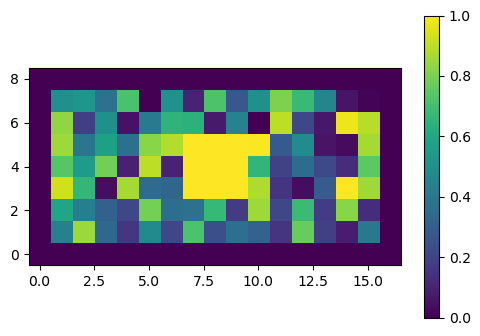

In [214]:
delta = 0.25
x = arange(-2,2+delta,delta)
y = arange(-1,1+delta,delta)
XX , YY = meshgrid(x,y)
V = malla_cuad_circ(x,y)
figure(dpi=100)
imshow(V.transpose(),origin='lower')
gca().set_aspect('equal')
colorbar()
show()

In [218]:
for i in range(1000):
    V = Relajar(V)

In [219]:
Ex,Ey = gradient(-V)

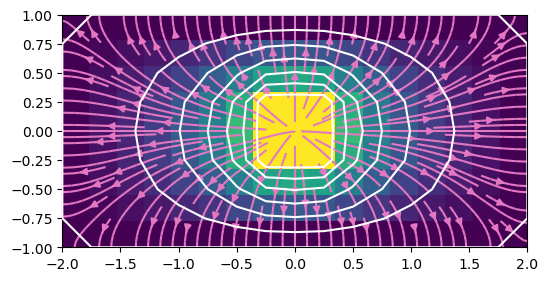

In [220]:
#contourf(XX , YY ,V.transpose())
figure(dpi=100)
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower',zorder=0)
contour(XX , YY ,V.transpose(),colors='white',zorder=10)
streamplot(XX,YY,Ex.transpose(),Ey.transpose(),color='tab:pink',density=1.3,
          maxlength=10)
gca().set_aspect('equal')
show()

In [213]:
V.shape

(161, 81)

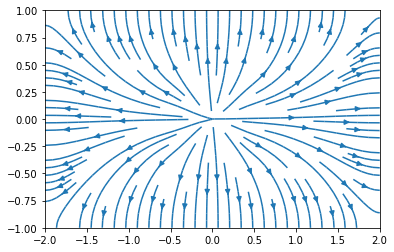